In [11]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../inkscape/cap6/crankshaft/"
PATH_EPS=BASE_PATH+"/../../../../../eps/cap6/crankshaft/"
fname = "speedup_mpi+openmp_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_17810_lumped_P1-P2-P4_hybrid.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

Number_Ranks  Number_Threads  Nodes_X_Threads MPI+OpenMP  P1_ElapsedTime  P2_ElapsedTime  P4_ElapsedTime  P1_SpeedUp  P2_SpeedUp  P4_SpeedUp  P1_Efficiency  P2_Efficiency  P4_Efficiency  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0              1               1                1        1+1          9.7037         61.5670        889.9984      1.0000      1.0000      1.0000         1.0000         1.0000         1.0000                 0.15                 0.20                 0.22                 99.87                 99.87                 99.92
1              1               2                2        1+2          6.2022         33.3536        548.1943      1.5645      1.8458      1.6235         0.7822         0.9229         0.8117                 0.20                 0.21                 0.29                 99.73                 99.69                 99.79
2              1               4                4        1+4          3.3850         17.7532        279.3519      2.8666      3.4679      3.1859         0.7166         0.8669         0.7964                 0.19                 0.27                 0.29                 98.52                 99.00                 99.67
3              1               8                8        1+8          1.9739          9.4418        160.1976      4.9160      6.5206      5.5556         0.6145         0.8150         0.6944                 0.22                 0.27                 0.34                 97.92                 98.53                 99.40
4              1              16               16       1+16          1.5343          6.0019         81.5960      6.3245     10.2579     10.9073         0.3952         0.6411         0.6817                 0.29                 0.30                 0.32                 91.86                 96.05                 98.79
5              1              20               20       1+20          1.7720          5.1816         72.4358      5.4761     11.8818     12.2867         0.2738         0.5940         0.6143                 0.32                 0.35                 0.39                 93.60                 95.47                 98.14
6              1              40               40       1+40          1.2140          4.8035         63.6970      7.9931     12.8171     13.9723         0.1998         0.3204         0.3493                 0.31                 0.35                 0.41                 94.02                 95.75                 97.83
7              2               1                2        2+1          5.1718         34.1691        475.0730      1.8762      1.8018      1.8733         0.9381         0.9009         0.9366                 0.15                 0.21                 0.22                 98.13                 93.24                 95.41
8              2               2                4        2+2          3.5376         19.9394        323.5063      2.7430      3.0877      2.7511         0.6857         0.7719         0.6877                 0.17                 0.24                 0.28                 97.45                 87.91                 88.43
9              2               4                8        2+4          2.1354         11.7910        178.0519      4.5442      5.2215      4.9985         0.5680         0.6526         0.6248                 0.24                 0.27                 0.28                 95.83                 79.89                 83.40
10             2               8               16        2+8          1.4901          7.5774         98.3698      6.5121      8.1250      9.0474         0.4070         0.5078         0.5654                 0.35                 0.32                 0.34                 90.98                 68.33                 72.48
11             2              16               32       2+16          1.0779          5.9718         69.2756      9.0024     10.3096     12.8472         0.2813         0.3221  

In [9]:
df_p1 = df[df['P1_SpeedUp'] == df.groupby(['Number_Ranks'])['P1_SpeedUp'].transform(max)]
df_p2 = df[df['P2_SpeedUp'] == df.groupby(['Number_Ranks'])['P2_SpeedUp'].transform(max)]
df_p4 = df[df['P4_SpeedUp'] == df.groupby(['Number_Ranks'])['P4_SpeedUp'].transform(max)]
df_p1
df_p1=df_p1.rename(columns={"P1_SpeedUp": "P1_SpeedUp_Max"})
df_p2=df_p2.rename(columns={"P2_SpeedUp": "P2_SpeedUp_Max"})
df_p4=df_p4.rename(columns={"P4_SpeedUp": "P4_SpeedUp_Max"})
df_p1

Number_Ranks  Number_Threads  Nodes_X_Threads MPI+OpenMP  P1_ElapsedTime  P2_ElapsedTime  P4_ElapsedTime  P1_SpeedUp_Max  P2_SpeedUp  P4_SpeedUp  P1_Efficiency  P2_Efficiency  P4_Efficiency  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
6              1              40               40       1+40          1.2140          4.8035         63.6970          7.9931     12.8171     13.9723         0.1998         0.3204         0.3493                 0.31                 0.35                 0.41                 94.02                 95.75                 97.83
13             2              40               80       2+40          0.8866          5.8314         56.2860         10.9448     10.5578     15.8120         0.1368         0.1319         0.1976                 0.49                 0.53                 0.49                 74.10                 49.78                 54.71
20             4              40              160       4+40          0.4960          2.3100         32.0748         19.5639     26.6523     27.7475         0.1222         0.1665         0.1734                 0.51                 0.59                 0.51                 63.30                 73.75                 49.76
27             8              40              320       8+40          0.3735          1.6474         19.6822         25.9804     37.3722     45.2184         0.0811         0.1167         0.1413                 0.45                 0.56                 0.47                 57.33                 54.35                 36.31
32            16              16              256      16+16          0.2226          0.5899         10.0362         43.5925    104.3685     88.6788         0.1702         0.4076         0.3464                 0.42                 0.40                 0.42                 76.11                 62.81                 44.95
39            20              16              320      20+16          0.1875          0.4366          6.7255         51.7530    141.0146    132.3319         0.1617         0.4406         0.4135                 0.41                 0.39                 0.38                 66.63                 69.99                 55.29
46            25              16              400      25+16          0.1621          0.3845          5.9878         59.8624    160.1222    148.6352         0.1496         0.4003         0.3715                 0.41                 0.41                 0.40                 76.51                 60.04                 57.07
53            30              16              480      30+16          0.1417          0.3267          4.4518         68.4805    188.4511    199.9187         0.1426         0.3926         0.4164                 0.42                 0.39                 0.47                 74.21                 61.95                 48.98

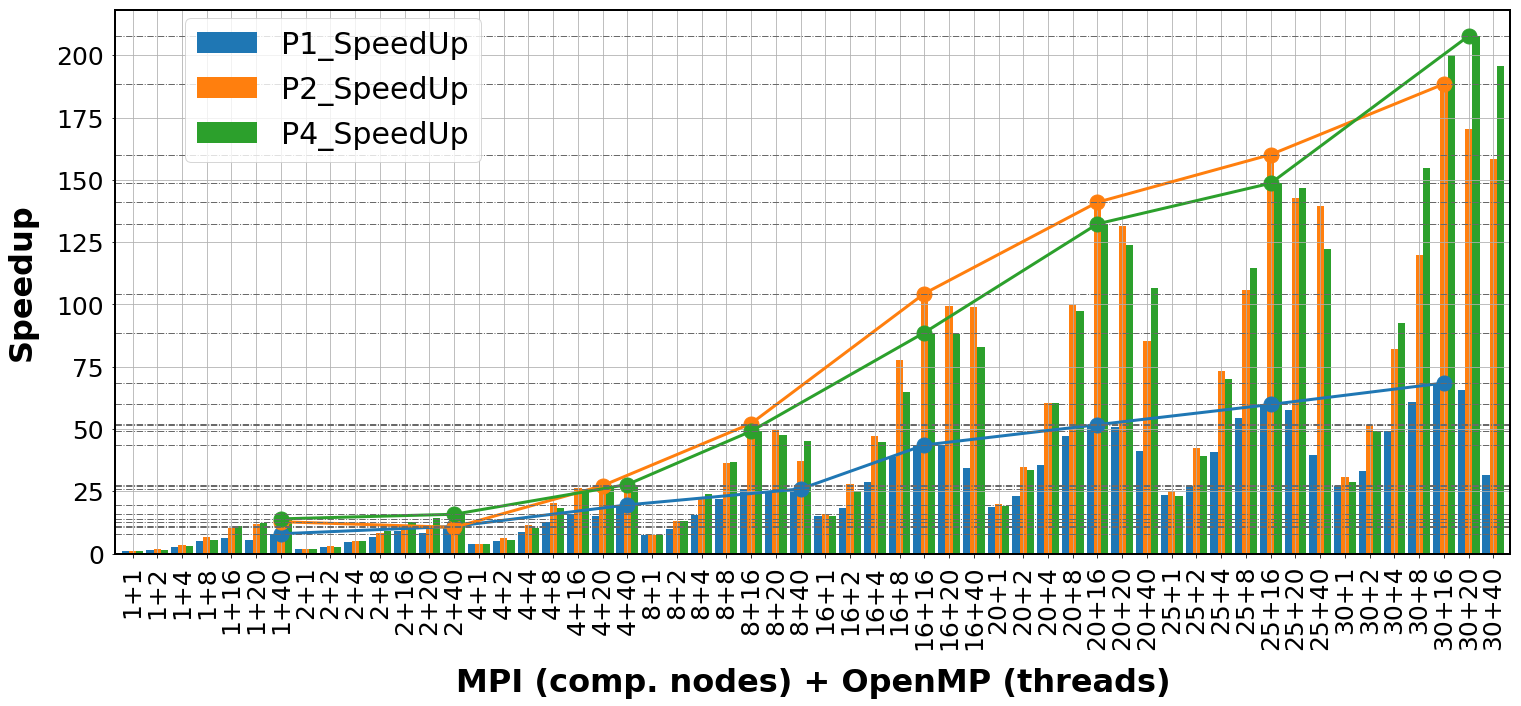

In [10]:
#  Plot bars
df.loc[0, 'MPI+OpenMP'] = '1  Node - Pure MPI'
df.loc[7, 'MPI+OpenMP'] = '2 Nodes - Pure MPI'
df.loc[14, 'MPI+OpenMP'] = '4 Nodes - Pure MPI'
df.loc[21, 'MPI+OpenMP'] = '8 Nodes - Pure MPI'
df.loc[28, 'MPI+OpenMP'] = '16 Nodes - Pure MPI'
df.loc[35, 'MPI+OpenMP'] = '20 Nodes - Pure MPI'
df.loc[42, 'MPI+OpenMP'] = '25 Nodes - Pure MPI'
df.loc[49, 'MPI+OpenMP'] = '30 Nodes - Pure MPI'



fig = df[['MPI+OpenMP', 'P1_SpeedUp', 'P2_SpeedUp', 'P4_SpeedUp']].\
plot(kind='bar', 
     x='MPI+OpenMP', 
     width=0.88, 
     fontsize=15, 
     figsize=(25, 10)
).get_figure()

ax = fig.gca()
ax.plot(df.loc[df_p1.index, ['P1_SpeedUp']],
        marker='o',
        linestyle='-',
        linewidth=3.0, markersize=15)

ax.plot(df.loc[df_p2.index, ['P2_SpeedUp']],
         marker='o',
         linestyle='-',
         linewidth=3.0, markersize=15)

ax.plot(df.loc[df_p4.index, ['P4_SpeedUp']],
         marker='o',
         linestyle='-',
         linewidth=3.0, markersize=15)


# print(df_p1['P1_SpeedUp_Max'].values)
lines = df_p1['P1_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle='-.', color='dimgrey', linewidth='1.0')
lines = df_p2['P2_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle='-.', color='dimgrey', linewidth='1.0')
lines = df_p4['P4_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle='-.', color='dimgrey', linewidth='1.0')     



plt.legend(loc=(0.05, .72), fontsize=30, frameon=True)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
ax.tick_params(axis='x', which='major', pad=8)
ax.tick_params(axis='y', which='major', pad=8)
plt.xlabel('MPI (comp. nodes) + OpenMP (threads)', fontsize=32, fontweight='bold', labelpad=18)
plt.ylabel('Speedup', fontsize=32, fontweight='bold', labelpad=18)




# xs=df_p1.index
# ys=df_p1['P1_SpeedUp_Max'].values

# # zip joins x and y coordinates in pairs
# for x,y in zip(xs,ys):
#     label = "{:.2f}".format(y)
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  fontsize=50.0,
#                  ha='center') # horizontal alignment can be left, right or center
    
    

plt.grid()
plt.show()

In [4]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')